Zadanie 1

Plik excercise zawiera wynik y i dane wejściowe x1, x2 dla 40 punktów danych, z dalszymi 20 punktami z danymi wejściowymi, ale bez wyniku.

- Wczytać plik do dataframe'a
- dopasować model regresji liniowej przewidujący y z x1, x2, używając pierwszych 40 punktów danych w pliku.
- Podsumować wnioski i sprawdźić dopasowanie modelu.
- Wyświetl oszacowany model graficznie,
- Wykonaj wykres residuów dla tego modelu. Czy wydaje się, że założenia zostały spełnione?
- Wykonaj prognozy dla pozostałych 20 punktów danych w pliku. Oceń pewność co do prognozach?



# Zad 1

In [1]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd
import plotnine as p9

In [2]:
from matplotlib import pyplot as plt

## Wczytanie danych

In [3]:
import pandas as pd
df_ex = pd.read_csv('exercise.csv')

In [4]:
df_ex.head()

,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68


In [5]:
import plotly.express as px

In [6]:
px.scatter(df_ex[:40], x = 'x1', y = 'x2')

In [9]:
X = df_ex[['x1', 'x2']][:40]
# y = df_ex['y'][:40]
# results = sm.OLS(y, X).fit()
results = smf.ols('y ~ x1+x2', data=df_ex[:40]).fit()
predictions = results.predict(X)
results.summary()
wyn=results.params

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Mon, 16 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        00:26:08   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Graficzne przedstawienie wyniku regresji:

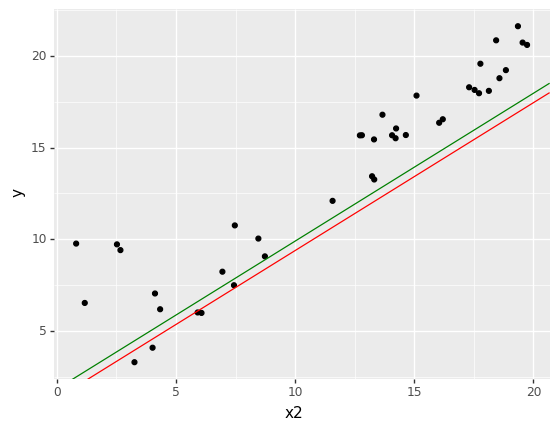

<ggplot: (-9223371925664285282)>

In [12]:
fig1=(p9.ggplot(p9.aes(x='x2',y='y'),data=df_ex[:40])
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x2']), colour="red")
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept']+wyn['x1'],slope=wyn['x2']), colour="green")  )
fig1

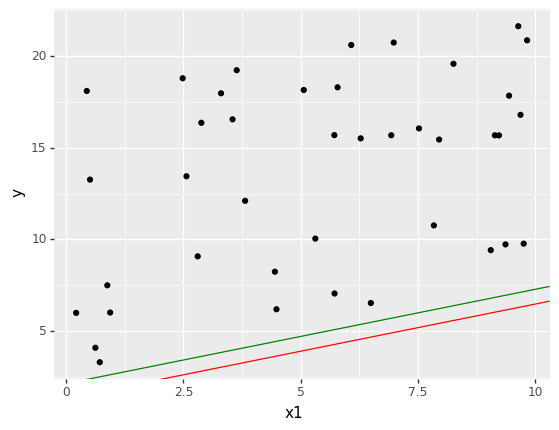

<ggplot: (-9223371925664226770)>

In [13]:
fig2=(p9.ggplot(p9.aes(x='x1',y='y'),data=df_ex[:40])
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x1']), colour="red")
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept']+wyn['x2'],slope=wyn['x1']), colour="green")  )
fig2

### Wykres residuów

C:\Users\Dorotka\Anaconda3\envs\notebook_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dorotka\Anaconda3\envs\notebook_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



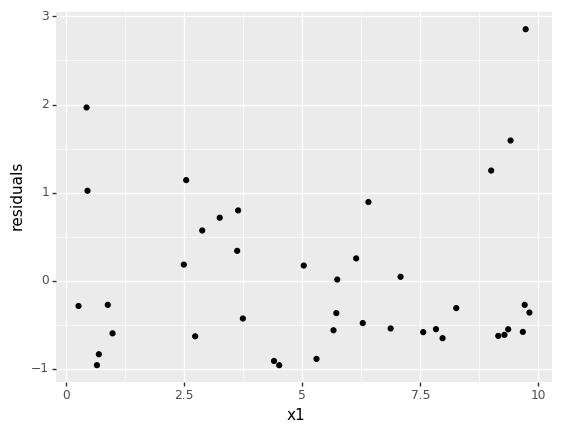

<ggplot: (85245015858)>

In [56]:
df=df_ex[:40]
df['ex_pred']=results.predict()
df['residuals']=df['y']-df['ex_pred']
fig1_res=(p9.ggplot(p9.aes(x='x1',y='residuals'),data=df)
      +p9.geom_point())
fig1_res


C:\Users\Dorotka\Anaconda3\envs\notebook_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dorotka\Anaconda3\envs\notebook_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



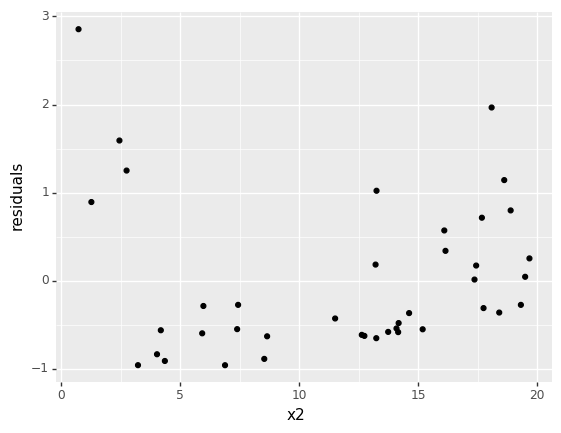

<ggplot: (-9223371951609699580)>

In [57]:
df=df_ex[:40]
df['ex_pred']=results.predict()
df['residuals']=df['y']-df['ex_pred']
fig1_res=(p9.ggplot(p9.aes(x='x2',y='residuals'),data=df)
      +p9.geom_point())
fig1_res

## Regresja dla pozostalych 20 danych:

In [16]:
predictions = results.predict(df_ex[['x1', 'x2']][40:])
wyn=results.params

In [17]:
fig3=(p9.ggplot(p9.aes(x='x1',y='y'),data=df_ex[:40])
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x1']), colour="red")
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept']+wyn['x2'],slope=wyn['x1']), colour="green")  )
fig4=(p9.ggplot(p9.aes(x='x2',y='y'),data=df_ex[:40])
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x2']), colour="red")
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept']+wyn['x1'],slope=wyn['x2']), colour="green")  )

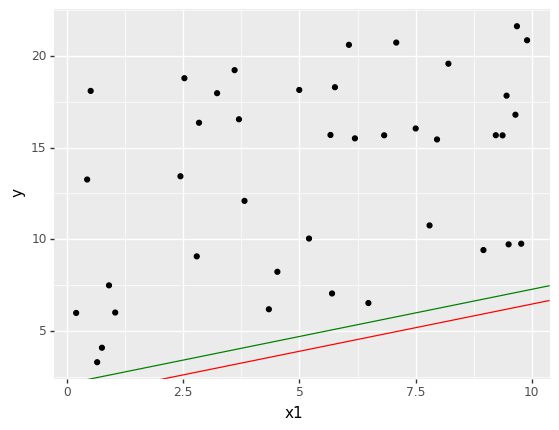

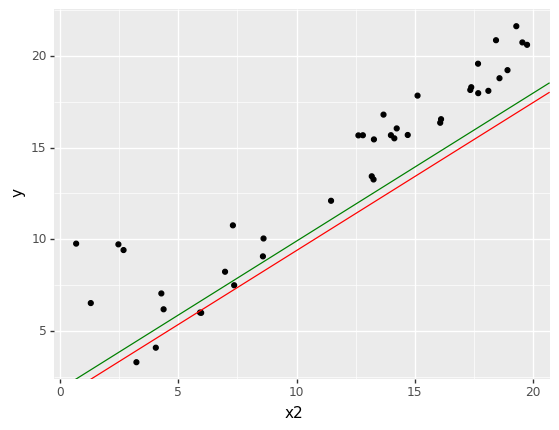

(<ggplot: (111194271110)>, <ggplot: (-9223371925660507325)>)

In [18]:
fig3, fig4

# ZAD 2

Zadanie 2

Plik beauty zawiera dane z pracy Hamermesha i Parker (2005) na temat oceny piękna instruktorów i jakości uch nauczania dla kilku kursów na University of Texas. Oceny dydaktyczne przeprowadzono pod koniec semestru, a oceny urody dokonano później przez sześciu studentów, którzy nie uczestniczyli w zajęciach i nie byli świadomi ocen kursu.

Utwórz regresję przy użyciu piękna (zmienna btystdave), aby przewidzieć oceny kursu (courseevaluation), kontrolując różne inne dane wejściowe. Wyświetl dopasowany model graficznie i objaśnij znaczenie każdego ze współczynników wraz z pozostałym odchyleniem standardowym. Wykreślić residua względem dopasowanych wartości.
Dopasuj niektóre inne modele, w tym piękno, a także inne zmienne wejściowe. Rozważ co najmniej jeden model z interakcjami. Dla każdego modelu określ, jakie są predyktory i jakie są dane wejściowe i wyjaśnij znaczenie każdego z jego współczynników

In [22]:
df_beauty = pd.read_csv('beauty.csv')
df_beauty.head()

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000


## Regresja courseevaluation~age+btystdave+percentevaluating

In [98]:
X = df_beauty[['btystdave', 'percentevaluating', 'age']]
y = df_beauty['courseevaluation']
results = smf.ols('courseevaluation~age+btystdave+percentevaluating', data=df_beauty).fit()
predictions = results.predict(X)
results.summary()
wyn1=results.params

In [99]:
wyn1

Intercept            3.459285
age                  0.001101
btystdave            0.116585
percentevaluating    0.006665
dtype: float64

In [119]:
fig3=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=df_beauty)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn1['Intercept'],slope=wyn1['btystdave']), colour="red")
      +p9.geom_abline(p9.aes(intercept=wyn1['Intercept']+wyn1['age']+wyn1['percentevaluating'],slope=wyn1['btystdave']), colour="green")  )

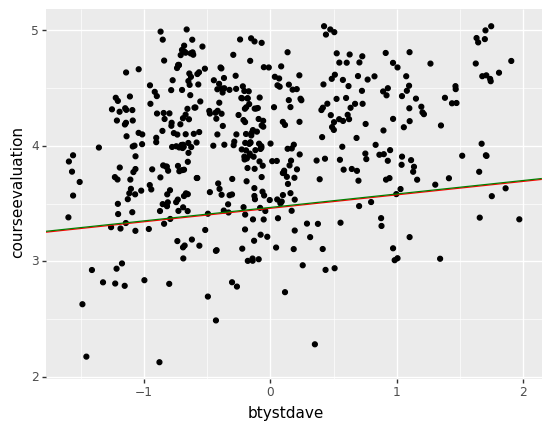

<ggplot: (-9223371951606203574)>

In [120]:
fig3

**Wniosek:** Dane `age` oraz `percentevaluating` nie maja znaczacego wpływu na wynik regresji

Wyznaczanie residuów:

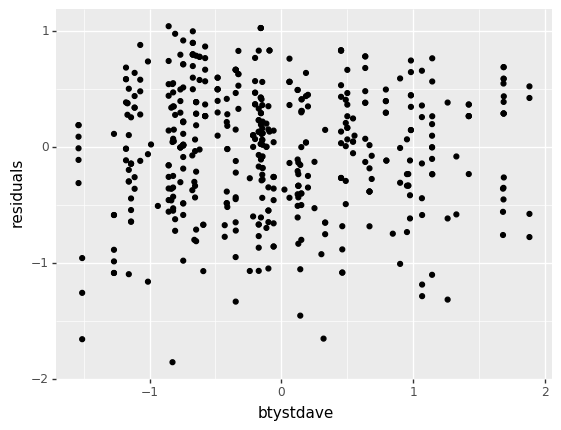

<ggplot: (85246371774)>

In [90]:
df=df_beauty
df['ex_pred']=results.predict()
df['residuals']=df['courseevaluation']-df['ex_pred']
fig1_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=df)
      +p9.geom_point())
fig1_res

# Regresja courseevaluation~btystdave+female  
Na wynik oceny kursu może mieć znaczący wpływ płeć oceniającej osoby. 

In [103]:
X = df_beauty[['btystdave', 'female']]
y = df_beauty['courseevaluation']
results = smf.ols('courseevaluation~btystdave+female', data=df_beauty).fit()
predictions = results.predict(X)
results.summary()
wyn2=results.params
wyn2

Intercept    4.094710
btystdave    0.148588
female      -0.197810
dtype: float64

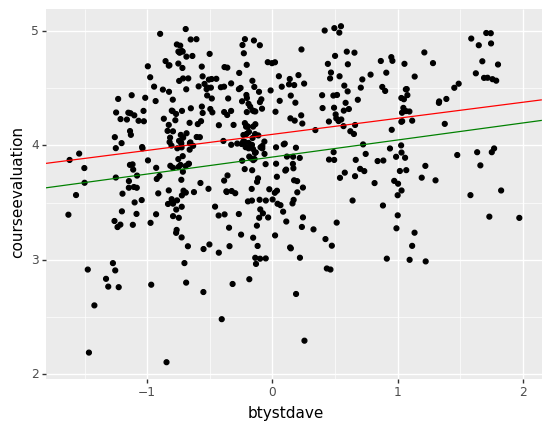

<ggplot: (-9223371951609720537)>

In [118]:
fig3=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=df_beauty)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn2['Intercept'],slope=wyn['btystdave']), colour="red")
      +p9.geom_abline(p9.aes(intercept=wyn2['Intercept']+wyn2['female'],slope=wyn2['btystdave']), colour="green")  )
fig3

**Wniosek:** Dane `age` poprawiają wynik regresji

#### Wykres residuów:

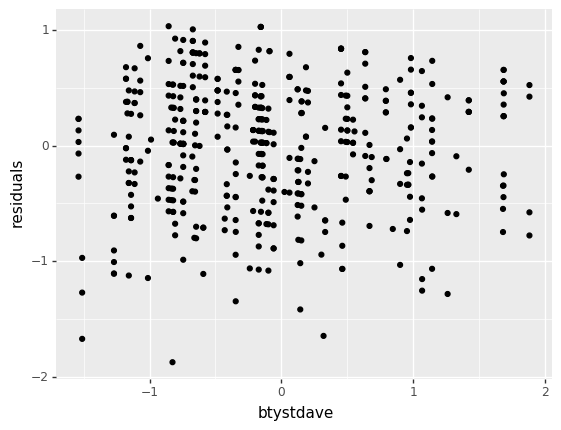

<ggplot: (-9223371951615249369)>

In [107]:
df=df_beauty
df['ex_pred']=results.predict()
df['residuals']=df['courseevaluation']-df['ex_pred']
fig1_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=df)
      +p9.geom_point())
fig1_res

# Regresja courseevaluation~age+btystdave+female  
Na wynik oceny kursu może mieć znaczący wpływ wiek i płeć oceniającej osoby. 

In [86]:
X = df_beauty[['btystdave', 'female', 'age']]
y = df_beauty['courseevaluation']
results = smf.ols('courseevaluation~age+btystdave+female', data=df_beauty).fit()
predictions = results.predict(X)
results.summary()
wyn=results.params
wyn

Intercept    4.225242
age         -0.002602
btystdave    0.139978
female      -0.210792
dtype: float64

In [95]:
fig3=(p9.ggplot(p9.aes(x='btystdave',y='y'),data=df_beauty)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['btystdave']), colour="red")
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept']+wyn['age']+wyn['female'],slope=wyn['btystdave']), colour="green")  )

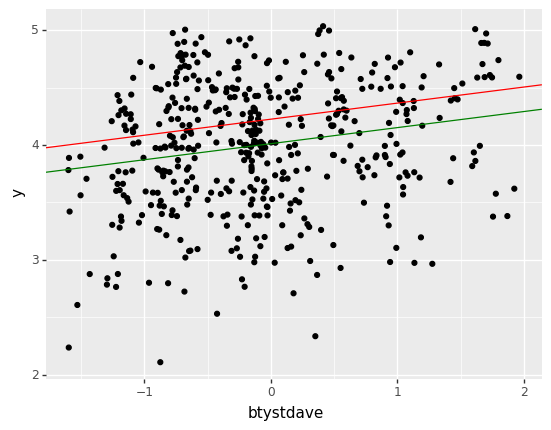

<ggplot: (-9223371951610026622)>

In [96]:
fig3

# Regresja courseevaluation~age+btystdave+female  
Na wynik oceny kursu może mieć znaczący wpływ wiek i płeć oceniającej osoby. 

In [114]:
X = df_beauty[['btystdave', 'class10']]
y = df_beauty['courseevaluation']
results = smf.ols('courseevaluation~class10+btystdave', data=df_beauty).fit()
predictions = results.predict(X)
results.summary()
wyn3=results.params
wyn3

Intercept    4.005773
class10      0.450086
btystdave    0.139914
dtype: float64

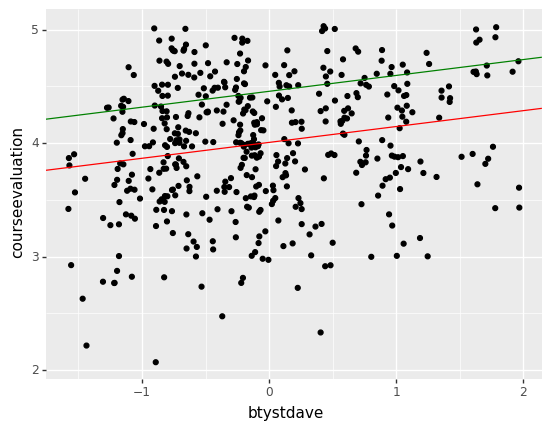

<ggplot: (-9223371951606802537)>

In [117]:
fig3=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=df_beauty)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn3['Intercept'],slope=wyn3['btystdave']), colour="red")
      +p9.geom_abline(p9.aes(intercept=wyn3['Intercept']+wyn3['class10'],slope=wyn3['btystdave']), colour="green")  )
fig3

**Wniosek:**Przynależność do klasy `class10` pogarsza jakosc regresji

## Wykres residuów:

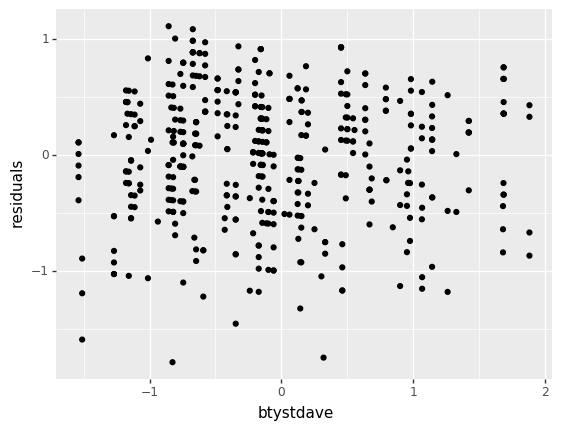

<ggplot: (-9223371951609770829)>

In [123]:
df=df_beauty
df['ex_pred']=results.predict()
df['residuals']=df['courseevaluation']-df['ex_pred']
fig1_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals'),data=df)
      +p9.geom_point())
fig1_res